<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/Hello-World/blob/master/tf2keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 の keras で MNIST

## import
Google Colaboratory ではまだデフォルトのTensorFlowは1.xなので、2.0に変更してインポート（近々デフォルトがアップデートされる予定のようです。）

In [1]:
# TensorFlow 2.0 install
try:
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

## Data
MNIST or FashionMNIST

In [0]:
mnist = tf.keras.datasets.mnist
# mnist = tf.keras.datasets.fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

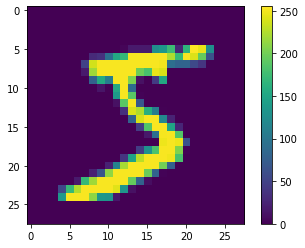

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

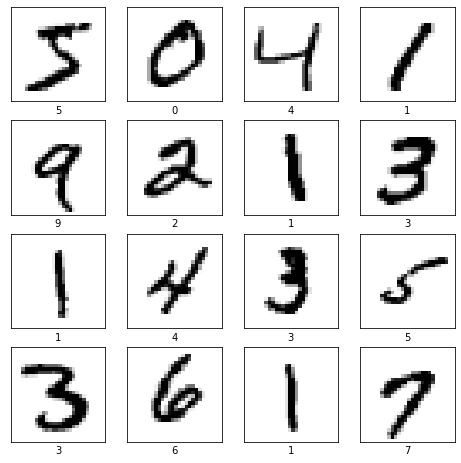

In [9]:
plt.figure(figsize=(8,8))
for i in range(4*4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
y_test.shape

(10000,)

## Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train

In [17]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2945 - accuracy: 0.9140 - val_loss: 0.1456 - val_accuracy: 0.9568
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1450 - accuracy: 0.9563 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1074 - accuracy: 0.9676 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0884 - accuracy: 0.9726 - val_loss: 0.0794 - val_accuracy: 0.9759
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.0763 - val_accuracy: 0.9776


In [18]:
history.history

{'accuracy': [0.91398335, 0.95626664, 0.96756667, 0.97263336, 0.97723335],
 'loss': [0.29453386657238007,
  0.14502795292908946,
  0.10736251953157286,
  0.08835241570609312,
  0.0753600429897507],
 'val_accuracy': [0.9568, 0.9687, 0.9741, 0.9759, 0.9776],
 'val_loss': [0.14558823936395346,
  0.10317659587264061,
  0.08543990215128287,
  0.07936833947175183,
  0.07629033072737511]}

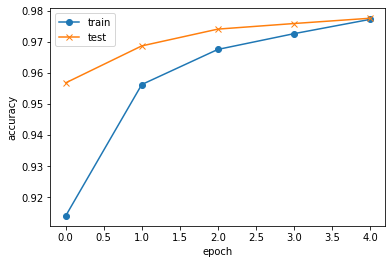

In [19]:
#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="train", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="test", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## Test

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0763 - accuracy: 0.9776


In [0]:
preds = model.predict(x_test)

In [22]:
preds.shape

(10000, 10)

In [0]:
import numpy as np

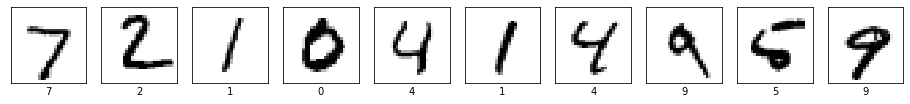

[7 2 1 0 4 1 4 9 5 9]


In [24]:
plt.figure(figsize=(16,16))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()
print(np.argmax(model.predict(x_test[0:10]), axis=1))

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

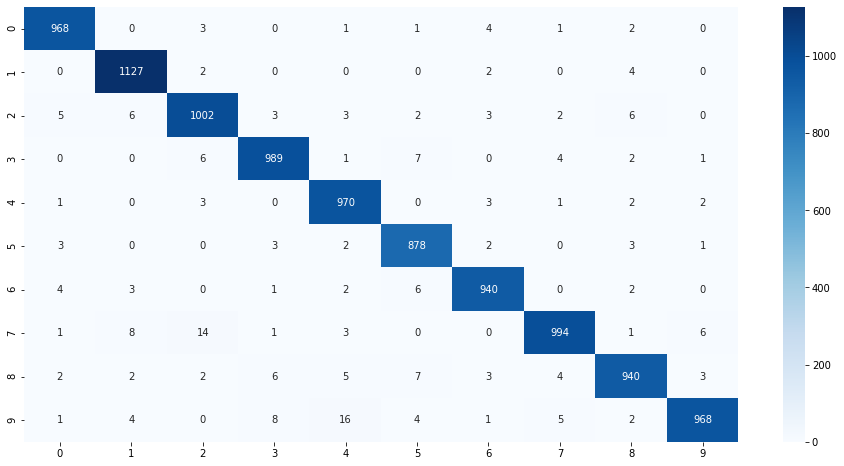

In [26]:
cm = confusion_matrix(y_test,np.argmax(preds,axis=1))
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()